# Parte 8
Sperimentazione numerica relativa all'approssimazione ai minimi quadrati. Si impiegano le funzioni per la fattorizzazione LU.

In [1]:
addpath ("./functions");

## Metodo delle equazioni normali

Risoluzione di un sistema lineare sovradeterminato per determinare i coefficienti di un polinomio approssimato ai minimi quadrati con il metodo delle equazioni normali.

    [a] = metodoEN(x, y, n)

Output:
- `a` vettore dei coefficienti del polinomio approssimante.

Input:
- `n` grado del polinomio approssimante,
- `x` vettore delle ascisse,
- `y` vettore delle ordinate.

Si effettua la costruzione della matrice rettangolare di Vandermonde

In [2]:
function [a] = NEmethod(x, y, n)

l = length(x);
H_completa = vander(x);

%{
dati n + 1 punti per il polinomio di grado n
si prelevano le colonne da l-n a l
il grado del polinomio determina le prime n colonne scartate
%}

H = H_completa(:, l - n : l); 

% Risolve il sistema delle equazioni normali H' ∗ Ha = H' y
% con fattorizzazione di Cholesky
A = H' * H;
b = H' * y;
[R, p] = chol(A);

if p > 0 % A non è definita positiva
    a = A \ b;
else % A è definita positiva
    b1 = lsolve(R' , b);
    a = usolve(R, b1);
end

l = length(x);

H_completa = vander(x);
H = H_completa(:, l - n : l); 

A = H' * H;
b = H' * y;

[R, p] = chol(A);

b1 = lsolve(R' , b);
a = usolve(R, b1);

end

## Metodo QR

Risoluzione di un sistema lineare sovradeterminato per determinare i coefficienti di un polinomio approssimato ai minimi quadrati con il metodo QRLS.

    [a] = metodoQR(x, y, n)

- `n` grado del polinomio approssimante;
- `a` vettore dei suoi coefficienti;

Partendo dai sperimentali, coppie `(x,y)`:
- `x` vettore delle ascisse;
- `y` vettore delle ordinate.

Si effettua la costruzione della matrice rettangolare di Vandermonde

- `Q` matrice ortogonale
- `R` matrice trapezoidale superiore
- `R_1` matrice triangolare superiore, blocco di `R`
- `y_1` vettore dei termini noti costruito a partire da `Q`
- `y_1` vettore dei termini noti, blocco di dimensioni pari a `R_1`

In [3]:
function [a] = QRmethod(x, y, n)

l = length(x);
H_completa = vander(x);

%{
dati n + 1 punti per il polinomio di grado n
si prelevano le colonne da l-n a l. Il grado del 
polinomio determina le prime n colonne scartate
%}
H = H_completa(:, l - n : l);

[Q, R] = qr(H);
R_1 = R(1 : n + 1, :);
y_1 = Q' * y;
y_1 = y_1(1 : n + 1);

a = usolve(R_1, y_1);

end

## Esercizio 1

Si effettua un confronto tra i risultati ottenuti a partire dal metodo delle equazioni normali e della fattorizzazione QR, sia dal punto di vista qualitativo, tramite grafici dei polinomi risolventi, che dal punto di vista quantitativo tramite il calcolo dei residui.

The degree of the polynomial must be greater than 1 and less than 5


 degree: 3


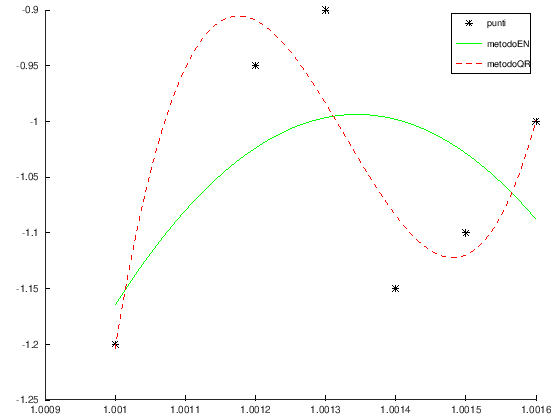

In [10]:
% Dati sperimentali

%x = [-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3]';
%y = [-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1]';
%x = [-3.14, -2.4, -1.57, -0.7, -0.3, 0, 0.4, 0.7, 1.57]';
%y = [0.02, -1, -0.9, -0.72, -0.2, -0.04, 0.65, 0.67, 1.1]';
%x = linspace(0, 3, 12)';
%y = exp(x_3 ).* cos(4 * x_3) + randn(12, 1);
x = [1.001, 1.0012, 1.0013, 1.0014, 1.0015, 1.0016]';
y = [-1.2, -0.95, -0.9, -1.15, -1.1, -1]';

% campionamento di x in base ai dati sperimentali
xx = linspace(min(x), max(x), 200)';

% punti iniziali su grafico
close
figure (1)
hold on
plot(x, y, 'k*');

% grado del polinomio
disp("The degree of the polynomial must be greater than 1 and less than 5");
n = input(" degree: ");
% blocco 1
[a_1] = NEmethod(x, y, n);
[a_1_qr] = QRmethod(x, y, n);
    
yy_1 = polyval(a_1, xx);
yy_1_qr = polyval(a_1_qr, xx);

plot(xx, yy_1, "g-", xx, yy_1_qr, "r--");
legend("punti", "metodoEN","metodoQR")

In [5]:
% residui
res_en = norm(y - polyval(a_1, x))
res_qr = norm(y - polyval(a_1_qr, x))

res_en =  0.23746
res_qr =  0.22746


## Esercizio 2

Si effettua un confronto, a partire dai dati sperimentali forniti, tra la qualità delle approssimazioni fornite dalla retta di regressione, dall'approssimazione ai minimi quadrati  espressa tramite parabola e tramite basi esponenziali.

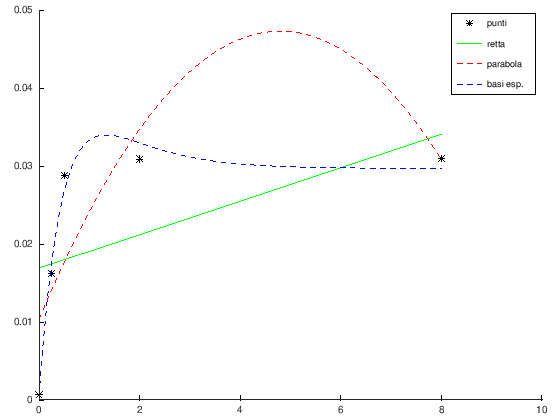

In [6]:
% Dati sperimentali
x = [0.0004, 0.2507, 0.5008, 2.0007, 8.0013]';
y = [0.0007, 0.0162, 0.0288, 0.0309, 0.0310]';

% campionamento di x in base ai dati sperimentali
xx = linspace(min(x), max(x));

% dati iniziali su grafico
close
figure(1)
hold on
plot(x, y, 'k*');

% retta di regressione
[a_1] = QRmethod(x, y, 1);
yy_1 = polyval(a_1, xx);

% parabola di approssimazione
[a_2] = QRmethod(x, y, 2);
yy_2 = polyval(a_2, xx);

% approssimazione ai minimi quadrati espressa 
% in termini di basi esponenziali

n = 2;
% per pol del tipo a * x + b * exp(-x) + c * exp(- 2 * x)
M = [ones(size(x)), exp(-x), exp(-2*x)];
% per polinomi del tipo a * x^3 + b * x^2 + c * x^1 + d * x^0 
C = vander(x);
% dato che lo si vuole valutare di un grado <4 si taglia la matrice
F = C(:, 3 : 5);

[Q, R] = qr(M);
R_1 = R(1: n + 1 ,:);
y_1 = Q' * y;
y_1 = y_1( 1 : n + 1);
a = usolve(R_1, y_1);
yy_3 = a(1) + a(2) * exp(-xx) + a(3) * exp(-2 * xx);

plot(xx, yy_1, "g-", xx, yy_2, "r--", xx, yy_3, "b--");
legend("punti", "retta", "parabola", "basi esp.")

In [7]:
% norma euclidea al quadrato dei vettori residui
% calcolo errori quadratici commessi a causa della scelta dei nodi
format long
E_1 = sum((polyval(a_1, x) - y).^2)
E_2 = sum((polyval(a_2, x) - y).^2)
E_3 = sum((a(1) + a(2) * exp(-x) + a(3) * exp(-2 * x) - y).^2 )

E_1 =    4.848327762313227e-04
E_2 =    2.364635594024985e-04
E_3 =    1.224973312890183e-05


Dato che $E_3 < E_2 < E_1$ si ha la conferma che la migliore approssimazione dei punti forniti è data dalla curva nella base esponenziale mentre la peggiore è data dalla retta di regressione.

## Esercizio 3

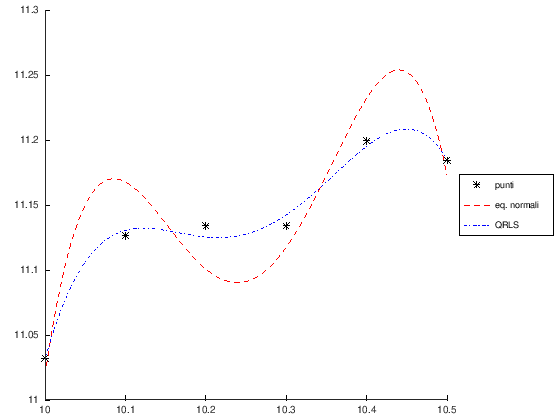

In [8]:
% dati sperimentali e dati perturbati
x = [10 : .5/5 : 10.5]';
y = [11.0320, 11.1263, 11.1339, 11.1339, 11.1993, 11.1844]';


xx = linspace(min(x), max(x));

n = 4;

[a_1_qr] = QRmethod(x, y, n);
[a_1] = NEmethod(x, y, n);

yy_qr = polyval(a_1_qr, xx);
yy = polyval(a_1, xx);

close
figure(1)
hold on
plot(x, y, "k*");

plot(xx, yy, "r--", xx, yy_qr, "b-.");
legend("punti", "eq. normali", "QRLS","location", "eastoutside");

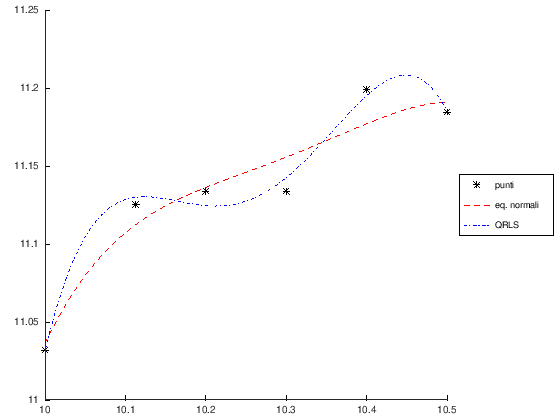

In [9]:
x(2) = x(2) + 0.013;
y(2) = y(2) - 0.001;

% [a_2] = polyfit(x, y, n); BADLY CONDITIONED
[a_1_qr] = QRmethod(x, y, n);
[a_1] = NEmethod(x, y, n);

% yy_2 = polyval(a_2, n);
yy_qr = polyval(a_1_qr, xx);
yy = polyval(a_1, xx);

figure(2)
hold on
plot(x, y, "k*");

plot(xx, yy, "r--", xx, yy_qr, "b-.");
legend("punti", "eq. normali", "QRLS", "location", "eastoutside");

Si nota che il risultato del metodo QRLS mantiene una buona accuratezza anche a fronte della perturbazione mentre con il metodo delle equazioni normali si ottiene una peggiore approssimazione a seguito della perturbazione dei dati.